In [11]:
import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 의사결정트리 시각화

**의사결정트리의 장점** <br>
다른 모델들에 비해, 큰 수학적인 지식이 없어도, 트리 그림을 보면, 어떻게 예측값이 도출되었는지 쉽게 알수 있다. <br>
**tree의 node** 는 질문이나 정답을 담은 네모 상자를 말하며 <br>
**root node**는 최상위 node이고
**leaf node**는 마지막 node 입니다.

**decision tree를 학습한다는 것은**<br>
정답에 가장 빨리 도다하는 True/False 질문목록을 학습하는 것입니다.
머신러닝에서 이런 질문들을 test라 합니다.
만약 tree를 만들때 모든 leaf node가 pure node가 될때까지 진행하면 model의 복잡도가 매우 높아지고
overfitting됩니다. 즉 train set의 모든 데이터 포인트가 leafnode에 있다는 뜻입니다.

**overfitting을 막는 전략 2가지**<br>
1. tree생성을 사전에 중단하니다. : 사전가지치기(pre-pruning)
2. 데이터 포인트가 적은 node를 삭제하거나 병합합니다:사후 가지치기(post-pruning)

**scikit-learn은 사전가지치기만**

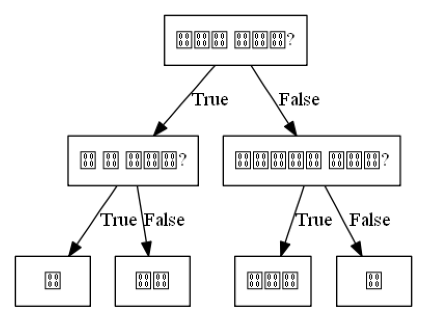

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
mglearn.plots.plot_animal_tree()
plt.show()

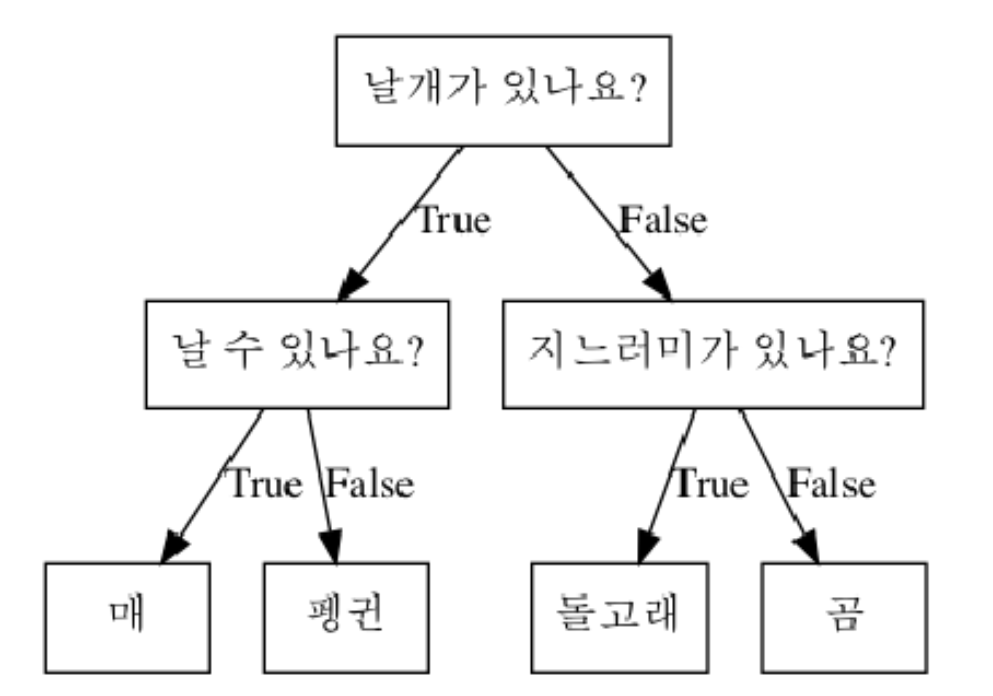

In [24]:
#위에 이미지 깨져서 이미지 삽입
from IPython.display import Image
Image('../data/decision_tree.png')

## 결정트리 만들기

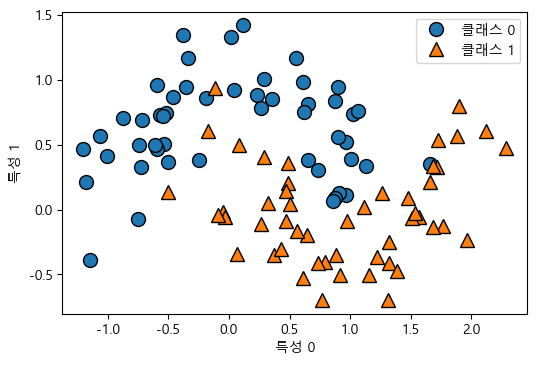

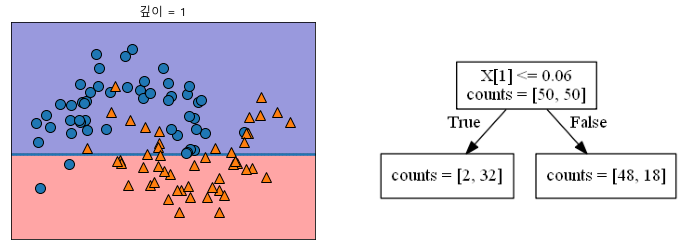

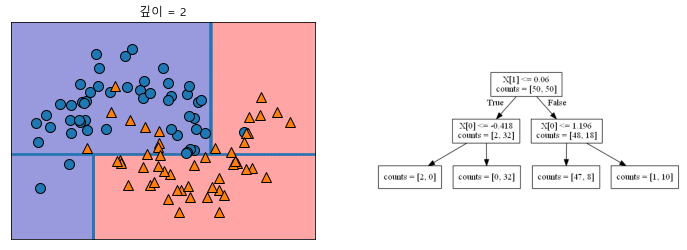

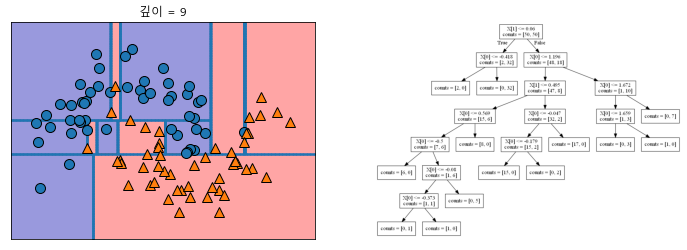

In [12]:
mglearn.plots.plot_tree_progressive()

## 결정트리의 복잡도 제어하기

### 1. 데이터정재하기(유방암)

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier #알고리즘 고르기

cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split #훈련,테스트 나눠서 무작위로 섞어 42번
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#stratify따로 설정 안하면 주어진75:25비율로 설정
tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train) #이 모델에 훈련
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


* 모든 리프 노드가 순수노드(마지막까지 내려가는것)이므로 훈련세트의 정확도는 100%이다.
즉, 트리는 훈련 데이터의 모든 레이블을 완벽하게 기억한다.결정트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해진다. 그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 일반화가 어렵다.

### 2. 사전 가지치기를 통한 학습 능력 판단하기

In [28]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) #max_depth가 사전가지치기
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))    

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


이는 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선된다. 이렇게 depth를 조절하여 과대적합을 막을수 있다.<br>
**max_depth** : 트리의 최대한도 깊이<br>
**random_state** : 여러번 실행해도 파라미터가 같을 경우, 결과가 항상 같게 만들어 주는 파라미터

### 3. 트리 그래프 그리기

위에서 사용한 데이터셋의 트리 그래프를 그려보자
ㅌ리 모듈의 export_graphviz함수를 이용해 트리를 시각화 할수 있다. 이 함수는 그래프 저장용 텍스트 파일 포맷인 .dot파일을 만든다. 각 노드에서 다수인 클래스를 색으로 나타내기 위해 옵션(filled=True)을 주고 적절히 레이블 되도록 클래스 이름과 특성 이름을 매개변수로 전달한다.

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["cancer", "not cancer"],
               feature_names=cancer.feature_names, impurity=False, filled=True)#filled 색깔
#source폴더에에 tree.dot 파일 생성됨

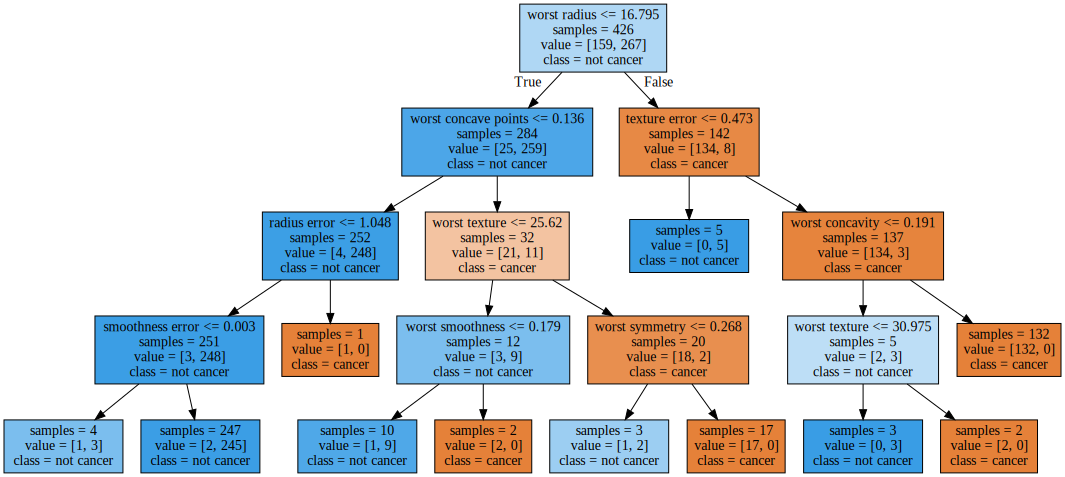

In [32]:
#tree.dot파일 읽어줌
import graphviz

with open(("tree.dot"),"r",encoding="utf-8")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [33]:
dot = graphviz.Source(dot_graph)
dot.render(filename='tree1.png')

'tree1.png.pdf'

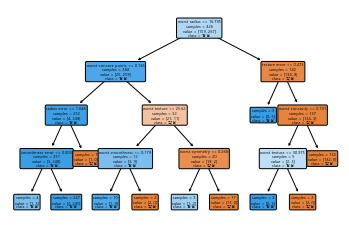

In [35]:
from sklearn.tree import plot_tree

plot_tree(tree,class_names=['악성','양성'],feature_names=cancer.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)
plt.show()

**sampls** : 노드 안에 들어있는 데이터 갯수<br>
**value** : 분류값 별 데이터 갯수<br>
**class** : 분류값<br>
트리를 시각화하면 알고리즘의 예측이 어떻게 이뤄지는지 이해하기 좋다. 하지만 트리의 depth가 깊어지면 보기가 힘들어진다.

## 특성 중요도

### 앞에서 보았듯이 데이터가 많아지고, 트리의 depth가 깊어질수록쉽게 이해하기 힘들다
이제 특성중요도에 대해서 알아보자<br><br>
**<특성 중요도>**<br>
0과 1사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않음을 의미하고,
1은 완벽하게 타깃 클래스에 예측했다는 뜻이다. 특성 주요도의 합은 1이다.

### 1. 트리의 중요도 확인하기

In [36]:
print("특성 중요도 : \n", tree.feature_importances_)
#트리가 어떤 feature를 중요하게 생각하는지 나타냄

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


### 2. 트리의 중요도 그래프 그리기

In [39]:
cancer.data.shape

(569, 30)

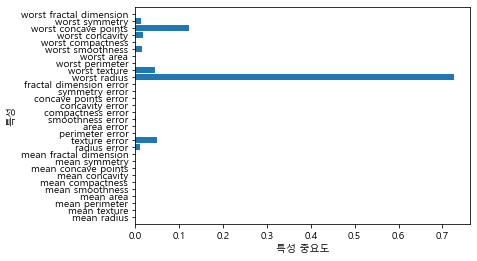

In [42]:
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

mean radius : 0.000
mean texture : 0.000
mean perimeter : 0.000
mean area : 0.000
mean smoothness : 0.000
mean compactness : 0.000
mean concavity : 0.000
mean concave points : 0.000
mean symmetry : 0.000
mean fractal dimension : 0.000
radius error : 0.010
texture error : 0.048
perimeter error : 0.000
area error : 0.000
smoothness error : 0.002
compactness error : 0.000
concavity error : 0.000
concave points error : 0.000
symmetry error : 0.000
fractal dimension error : 0.000
worst radius : 0.727
worst texture : 0.046
worst perimeter : 0.000
worst area : 0.000
worst smoothness : 0.014
worst compactness : 0.000
worst concavity : 0.018
worst concave points : 0.122
worst symmetry : 0.012
worst fractal dimension : 0.000


<AxesSubplot:>

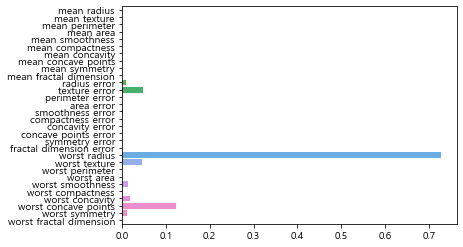

In [45]:
import seaborn as sns
%matplotlib inline

#feature별 imprtance 매핑
for name, value in zip(cancer.feature_names, tree.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
#feature importance를 column별로 시각화 하기
sns.barplot(x = tree.feature_importances_, y = cancer.feature_names)

**그래프를 그려보면 worst_radius값이 제일 많이 사용되었음을 알수 있다.**
* 결정 트리 그래프에서 최상위 노드가 worst_radius였던 것을 확인하면 잘 나누고 있었다는 것을 알수 있다.
* 그러나 어떤 특서의feature_importances값이 낮다고 해서 유용하지 않다는 뜻은 아니다.
* 단지 트리가 그 특성을 선택하지 않았을 뿐 다른 특성이 동일한 정보를 가지고 있어서 일수도 있다.

### 3. 특성과 클래스(양성/음성)과의 관계를 알아보자
특정 특성 1가지 값에 대한 클래스 값(양성/음성)인지 그래프를 그려서 확인

Feature importances: [0. 1.]


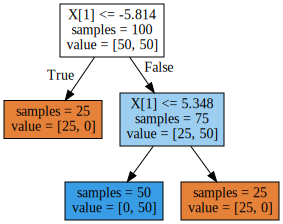

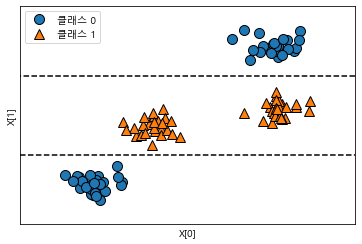

In [46]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

* y축의 특성이 클래스 레이블과 복합적인 관계의 결정 경계
* 위 그래프를 보면 클래스 값과 특서에 따른 관계를 볼수 있다.
* X[1]특성 만으로는 양성인지, 음성인지 알수가 없다.

#### 1) 램 가격 그래프 그리기

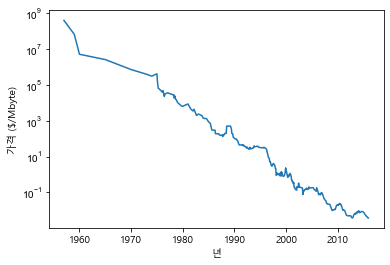

In [50]:
import os
import pandas as pd
ram_prices = pd.read_csv("../data/ram_price.csv")

plt.yticks(fontname = "Arial")
#한글 폰트가 지수에 음수를 표시하지 못함으로 ytick의 폰트를 바꿔줌
plt.semilogy(ram_prices.date, ram_prices.price) #semilogy : 로그 그래프
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show()

#### 2)두가지 모델로 예측한 2000년도 이후 ram 가격 그래프
* 날짜 특성 하나만으로 2000년 이후의 가격을 예측해보자
* 선형 회귀모델과 회귀 결정 트리모델로 예측한 2000년도 이후의 가격 그래프를 그려서 비교

In [56]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#2000년 이전을 훈련데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000] #훈련
data_test = ram_prices[ram_prices.date >= 2000] #테스트

#가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date.to_numpy()[:, np.newaxis] #newaxis전체로 확대
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

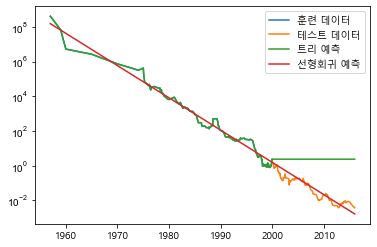

In [58]:
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()
plt.show()
#트리는 기존의 데이터는 완전히 겹치는데 새로운 데이터에 대해 전혀 예측하지 못한다.
#선형회귀는 새로운 데이터에 대해서도 잘 예측한다.

* 두모델 (결정트리와 선형회귀)은 확실한 차이를 보여주고 있다.
* 선형모델은 직선으로 데이터를 200년대 이후를 거의 정확히 예측한다.
* 트리모델은 훈련 데이터를 완벽하게 예측한다.
* 하지만, 트리의 복잡도에 제한을 두지 않아 전체 훈련 데이터를 기억하기때문에 범위 밖의 데이터로 나가면서 마지막 포인트르 이용해 예측하는 것이 전부이다
* 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다.
* 이것은 모든 트리 기반 모델의 공통된 단점이다.

#### 결정트리 모델
* 결정 트리에서 모델 복잡도를 조절하는 매개변수는 사전 가지치기이다.(max_depth)

* 장점
1. 만들어진 모델을 쉽게 시각화할수 있다.
2. 데이터의 스케일에 구앱ㄷ지 않는다. 각 특성이 개별적으로 처리되어 데이터를 분할하는데 영향을 받지 않는다.
3. 정규화나 표준화 같은 전처리 과정이 필요없다.

* 단점
1. 사전 가지치기를 사용한다고 해도 과대적합이 될 수 있다. -> 일반화하기 힘들다.
2. 과대적합의 문제의 대안으로 앙상블 방법을 사용한다.

# 2.3.6 결정 트리 앙상블 기법
* **앙상블(ensemble)**은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.
* 다양한 앙상블 기법중에서 **랜덤 포레스트(random forest)**와 **그래디언트 부스팅(gradient boosting)**결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용합니다.
* 두 모델은 분류와 회귀 문제의 다양한 데이터셋에서 효과적이라고 입증되어 있다.


## 1. 랜덤 포레스트 - 배깅방식(같은 알고리즘 씀)
* 결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이었다.
* 랜덤 포레스트는 이 문제를 회피할수 있는 방법이다.
* 랜덤 포레스트는 기본적으로 여러 결정 트리의 묶음이라고 보면 된다.
*각 트리는 비교적 예측을 잘 하고 있지만 일부에 과대 적합하다는 경향을 갖고 있음에 기초한다.
*서로 다른 방햐으로 과대적합된 트리를 많이 만ㄷ르면 그 결과를 평균냄으로써 과대적합된 양을 줄일수 있다.
* 이러한 전략은 구현하기 위해서는 결정 트리를 많이 만들어야 한다.
* 각각의 트리는 타깃 예측을 잘 해야하고 다른 트리와느 구별되어야 한다.

** 랜덤 포레스트에서 트리를 랜덤하게 만드는 방법은 두가지**<br>
1.데이터를 무작위로 선택하기<br>
2.분할 테스트에서 특성을 무작위로 선택하기

##### 랜덤 포레스트 구축
* 랜덤 포레슽트 모델을 만들기 위해 생성할 트리의 개수를 정해야한다.
(RandomFroestRegreesor나 RandomForestClassifier의 n_estimators(트리개수나타냄)매개변수)

##### 랜덤 포레스트 특징
1) 부스팅-중복된 데이터를 허용<br>
2) 랜덤 셀렉션과 피쳐 질문이 랜덤, 가장 좋은 질문이 아닐수 있다.(decision tree는 가장 좋은질문)<br>
3) 투표

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) 
#나무 5개 만들어주세요
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

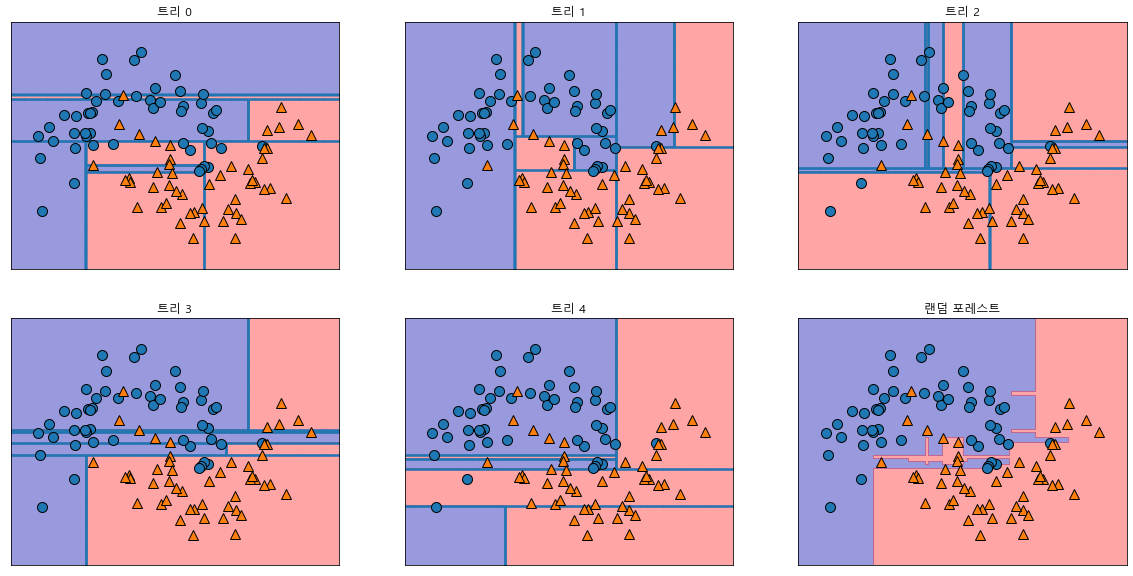

In [74]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.show()

* 결정 트리처럼 랜덤 포레스트도 특성 중요도를 제공한다
* 각 트리의 트성 중요도를 취합하여 계산한 것이다
* 일반적으로 랜덤 포레스트에서 제공하는 특성 중요도가 하나의 트리에서 제공하는 것보다 더 신뢰도가 높다.

### 2) 랜덤포레스트 -cancer 데이터셋 -100개의 트리

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) #100개트리만들어주세요
forest.fit(X_train, y_train)

print("훈련세트 정확도:{:.3f}".format(forest.score(X_train, y_train)))
print("테스트세트 정확도:{:.3f}".format(forest.score(X_test, y_test)))

훈련세트 정확도:1.000
테스트세트 정확도:0.972


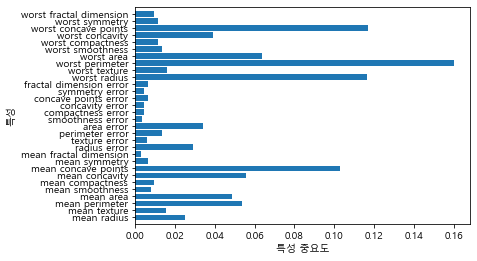

In [79]:
#트리의 중요도(아까만들어 놓은 함수)
plot_feature_importances_cancer(forest)

* 단일 트리의 결과와 마찬가지로 랜덤 포레스트도 worst radius특성이 중요하다고 보지만 가장 많은 정보를 가진 특성으로는 worst perimeter로 선택했다.
* 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼수 있다.

##### 장단점과 매개변수
* 회귀와 분류에 있어서 랜덤 포레스트는 현재 가장널리 사용되는 머신러닝 알고리즘이다.
* 랜덤 포레스트는 성능이 매우 뛰어나고 매개 변수 튜닝을 많이 하지않아도 잘 작도하며 데이터의 스케일을 맞출 필요도 없다
* 기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 가지고 있다.
* 대량의 데이터세에서 랜덤 포레스트 모델을 마들때 다소 시간이 걸리수 있지만 (트리를 많이 만들어서) CPU코어가 많다면 손쉽게 병렬 처리할수 있다.
* n_job매개변수를 이용하여 사용할 코어수를 지정할수 있다.(n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.)
* 주의할점
* 랜덤 포레스트는 랜덤하기 때문에 random_state를 지정하면 전혀 다른 모델이 만들어 진다.
* 당연히 랜덤 포레스트의 트리가 많을수록 random_state값으 ㅣ변화에 따른 변동이 적다.
* 랜덤 포레스트는 텍스트 데이터와 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다.
* 이러한 데이터에는 선형 모델이 더 적합하다
* 메모리를 맣이 사용하기에 훈련과 예측이 느리다
* 중요 매개변수는  n_estimators, max_features이고 max_depth같은 사전 가지치기 옵션이 있다.
* n_estimators는 클수록 좋다. 더 많은 트리를 평균하면 과대 적합을 줄여 안정적인 모델을 만들수 잇다.(메모리와 훈련시간은 증가한다.)
* max_features는 각 트리가 얼마나 무작위가 될지를 결정하며, 작은 max_features는 과대적합을 줄인다. 일반적으로는 기본값을 쓰면 된다.

## 2. 그레디언트 부스팅 회귀 트리
* 그래디언트 부스팅 회귀 트리는 여러개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 기법이다.
* 이름이 회귀지만 회귀/분류 모두 사용할수 있다.
* 랜덤 포레스트와 달리 그래디언트 부스팅은 이전트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다. 기본적으로 그래디언트부스팅 회귀 트리에는 무작위성이 없다.
* 대신 강력한 사전 가지치기가 사용된다.
* 그래디언트 부스팅 트리는 머신러닝 경연대회에서 우승을 많이 차지하였고, 업계에서도 널리 사용된다.
* 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 높은 정확도를 제공해 준다.

### 유방암 데이터셋을 이용한 그래디언트 부스팅 회귀 트리를 이용한 분류 성능 측정

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))
#과대적합(훈련셋)

훈련세트 정확도:1.000
테스트세트 정확도:0.965


* 기본값 : 깊이 3, 트리 100개, 학습률 0.1

In [89]:
#훈련세트 좀 줄더라도 테스트 세트 정확도 올림(depth를 1로 낮춰서 튜닝함으로)
#성능좋아짐
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))

훈련세트 정확도:0.991
테스트세트 정확도:0.972


In [91]:
# 하이퍼파라메터 조금만더 조정해보자 (learning_rate학습률 0.1->0.01로 조정)
# 별로 좋아지지 않음. 앞의 트리의 깊이를 낮추는 것이 가장 효율적임
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))

훈련세트 정확도:0.988
테스트세트 정확도:0.965


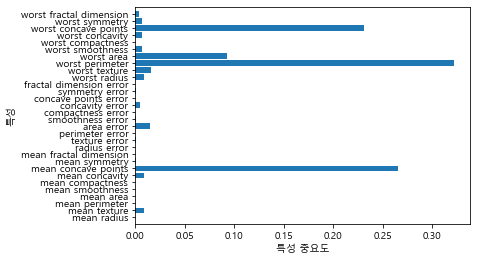

In [93]:
#그래디언트 피처는 무엇을 가장 중요하게 여기는지 보면 worst area이다.
#결정 트리, 포레스트 와 중요하다고 하는 것이 또 다름.
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

# 2.3.8 커널 서포트 벡터 머신(SVM)

In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련세트 정확도:{:.2f}".format(svc.score(X_train, y_train)))
print("테스트세트 정확도:{:.2f}".format(svc.score(X_test, y_test)))

훈련세트 정확도:0.90
테스트세트 정확도:0.94


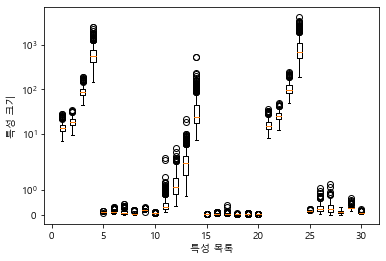

In [103]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

### SVM을 위한 데이터 전처리

### 1. Min-Max Scaling 
* 변수의 값이 너무 크거나, 작을때 제대로 표현되지 않을수 있기 때문에 스케일링을 해야한다.
* 최대, 최소값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다. 아직 스케일링 방법 모르기 때문에 이 수식 그대로 사용<br><br>
- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$

In [106]:
#훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
#훈련 세트에서 특성별(최대값-최솟값)범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

#훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 대해 최솟값은 0 최대값은 1임
X_train_scaled = (X_train - min_on_training)/ range_on_training
print("특별성 최솟값\n", X_train_scaled.min(axis=0))
print("특별성 최댓값\n", X_train_scaled.max(axis=0))

특별성 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특별성 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [107]:
#테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다.(자세한 내용은 3장에)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [109]:
# 스케일링 하기전(0.90, 0.94)였는데 스케일링 하고 나니 결과가 더 정확해 졌다.
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련세트 정확도:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트세트 정확도:{:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련세트 정확도:0.984
테스트세트 정확도:0.972


In [110]:
#C값 적용하니 정확도가 더 올라갔다!!!
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련세트 정확도:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트세트 정확도:{:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련세트 정확도:0.988
테스트세트 정확도:0.979


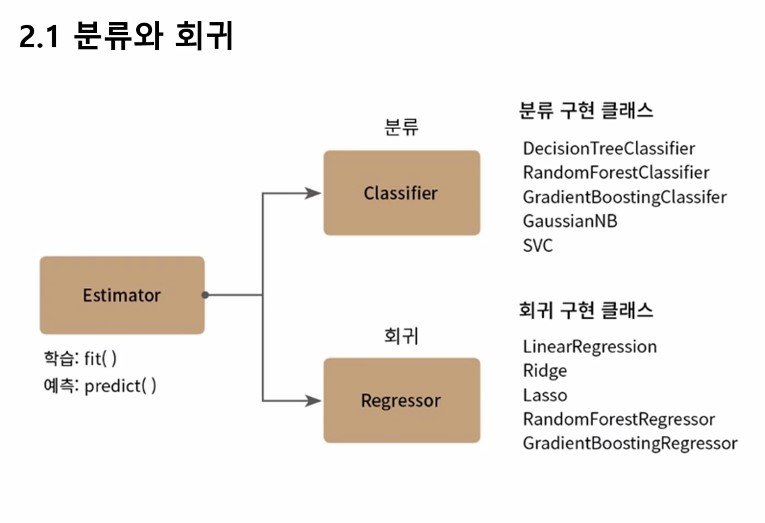

In [111]:
from IPython.display import Image
Image('../data/24.jpg')